In this project we will be using correlation to determine what factors will effect a movies gross revenue.

My hypothesis is that that the higher the budget of the film the more gross revenue they will bring in. I also beleive there will be a high correlation between the size of the company and the amount gross they bring in.

Data source: https://www.kaggle.com/danielgrijalvas/movies/version/2

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [96]:
#Read the data
df = pd.read_csv('movies.csv', encoding='latin-1')

In [97]:
df.head()

budget                                 company country       director  \
0   8000000.0           Columbia Pictures Corporation     USA     Rob Reiner   
1  15000000.0                      Paramount Pictures     USA     Tony Scott   
2  18500000.0  Twentieth Century Fox Film Corporation     USA  James Cameron   
3   6000000.0                      Paramount Pictures     USA    John Hughes   
4   9000000.0                      Paramount Pictures     USA  Howard Deutch   

       genre        gross                      name rating    released  \
0  Adventure   52287414.0               Stand by Me      R  1986-08-22   
1     Action  179800601.0                   Top Gun     PG  1986-05-16   
2     Action   85160248.0                    Aliens      R  1986-07-18   
3     Comedy   70136369.0  Ferris Bueller's Day Off  PG-13  1986-06-11   
4     Comedy   40471663.0            Pretty in Pink  PG-13  1986-02-28   

   runtime  score               star         writer  year  
0       89    8.1        Wil Wheaton   Stephen King  1986  
1      110    6.9         Tom Cruise       Jim Cash  1986  
2      137    8.4   Sigourney Weaver  James Cameron  1986  
3      103    7.8  Matthew Broderick    John Hughes  1986  
4       96    6.8     Molly Ringwald    John Hughes  1986

In [98]:
#Check for missing data in the dataset
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing * 100))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
writer - 0.0%
year - 0.0%


In [99]:
#Data types of our columns

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
writer       object
year          int64
dtype: object

In [100]:
#Change data type of columns

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')


In [101]:
df.head()

budget                                 company country       director  \
0   8000000           Columbia Pictures Corporation     USA     Rob Reiner   
1  15000000                      Paramount Pictures     USA     Tony Scott   
2  18500000  Twentieth Century Fox Film Corporation     USA  James Cameron   
3   6000000                      Paramount Pictures     USA    John Hughes   
4   9000000                      Paramount Pictures     USA  Howard Deutch   

       genre      gross                      name rating    released  runtime  \
0  Adventure   52287414               Stand by Me      R  1986-08-22       89   
1     Action  179800601                   Top Gun     PG  1986-05-16      110   
2     Action   85160248                    Aliens      R  1986-07-18      137   
3     Comedy   70136369  Ferris Bueller's Day Off  PG-13  1986-06-11      103   
4     Comedy   40471663            Pretty in Pink  PG-13  1986-02-28       96   

   score               star         writer  year  
0    8.1        Wil Wheaton   Stephen King  1986  
1    6.9         Tom Cruise       Jim Cash  1986  
2    8.4   Sigourney Weaver  James Cameron  1986  
3    7.8  Matthew Broderick    John Hughes  1986  
4    6.8     Molly Ringwald    John Hughes  1986

In [102]:
#Update the year column
df['year_correct'] = df['released'].astype(str).str[:4]

In [103]:
df.head()

budget                                 company country       director  \
0   8000000           Columbia Pictures Corporation     USA     Rob Reiner   
1  15000000                      Paramount Pictures     USA     Tony Scott   
2  18500000  Twentieth Century Fox Film Corporation     USA  James Cameron   
3   6000000                      Paramount Pictures     USA    John Hughes   
4   9000000                      Paramount Pictures     USA  Howard Deutch   

       genre      gross                      name rating    released  runtime  \
0  Adventure   52287414               Stand by Me      R  1986-08-22       89   
1     Action  179800601                   Top Gun     PG  1986-05-16      110   
2     Action   85160248                    Aliens      R  1986-07-18      137   
3     Comedy   70136369  Ferris Bueller's Day Off  PG-13  1986-06-11      103   
4     Comedy   40471663            Pretty in Pink  PG-13  1986-02-28       96   

   score               star         writer  year year_correct  
0    8.1        Wil Wheaton   Stephen King  1986         1986  
1    6.9         Tom Cruise       Jim Cash  1986         1986  
2    8.4   Sigourney Weaver  James Cameron  1986         1986  
3    7.8  Matthew Broderick    John Hughes  1986         1986  
4    6.8     Molly Ringwald    John Hughes  1986         1986

In [104]:
#order the data from highest gross to lowest
df.sort_values(by = ['gross'], inplace = False, ascending = False)


budget                                            company  \
2903  245000000                                          Lucasfilm   
2302  237000000             Twentieth Century Fox Film Corporation   
1100  200000000             Twentieth Century Fox Film Corporation   
2916  150000000                                 Universal Pictures   
2603  220000000                                     Marvel Studios   
2200  185000000                                       Warner Bros.   
3011  200000000                                          Lucasfilm   
3088  200000000                            Pixar Animation Studios   
1310  115000000                                          Lucasfilm   
2920  250000000                                     Marvel Studios   
2602  250000000                                       Warner Bros.   
1846  150000000                                         DreamWorks   
2742  130000000                                        Color Force   
2006  225000000                               Walt Disney Pictures   
2428  200000000                               Walt Disney Pictures   
2739  200000000                                     Marvel Studios   
3030  250000000                                     Marvel Studios   
2605   78000000                                          Lionsgate   
1605  139000000                      Columbia Pictures Corporation   
702    63000000                                 Universal Pictures   
2327  200000000                                         DreamWorks   
2701  150000000                      Walt Disney Animation Studios   
2502  125000000                                       Warner Bros.   
1710   94000000                            Pixar Animation Studios   
1920  113000000                                          Lucasfilm   
1702   94000000                                    New Line Cinema   
1839  200000000                      Columbia Pictures Corporation   
1836   30000000                                   Icon Productions   
3060   75000000                                 Universal Pictures   
2744   76000000                                 Universal Pictures   
3073  175000000                             Fairview Entertainment   
3015   58000000             Twentieth Century Fox Film Corporation   
2928  175000000                            Pixar Animation Studios   
2921  190000000                                 Universal Pictures   
2521  195000000                                 Paramount Pictures   
2830   58800000                                       Warner Bros.   
1606   94000000                                    New Line Cinema   
3027  150000000                               Walt Disney Pictures   
2846  125000000                                        Color Force   
2118  258000000                                  Columbia Pictures   
2955   74000000                         Illumination Entertainment   
2420  200000000                               Walt Disney Pictures   
2801  170000000                                     Marvel Studios   
3021  250000000                                       Warner Bros.   
802    55000000                                 Paramount Pictures   
3003  175000000                                Atlas Entertainment   
2164  160000000                               DreamWorks Animation   
2102  150000000                                         DreamWorks   
2211  140000000                                 Paramount Pictures   
1500  125000000                                       Warner Bros.   
2230  185000000                                 Paramount Pictures   
1502   93000000                                    New Line Cinema   
804    45000000                               Walt Disney Pictures   
2431  200000000                                 Paramount Pictures   
1624  115000000                                          Lucasfilm   
2111  300000000                               Walt Disney Pictures   
1001   75000000    

In [105]:
pd.set_option('display.max_rows', None)

In [106]:
#Drop any duplicates
df['company'].drop_duplicates().sort_values(ascending = False)

2422                                          micro_scope
1233                          Zucker Brothers Productions
1299                              Zentropa Entertainments
184                                  Zenith Entertainment
2191                                      Zazen Produções
334                                   Zanuck Company, The
255                           Zacharias-Buhai Productions
2175                           Young Hannibal Productions
2316                                          Yellow Bird
1257                                X-Filme Creative Pool
2722                              Worldview Entertainment
2612                                  Working Title Films
1700                                         Wiseau-Films
624                                         WingNut Films
2957                                       Wildgaze Films
2203                                           Wild Bunch
2012                      Wiedemann & Berg Filmproduktion
2685          

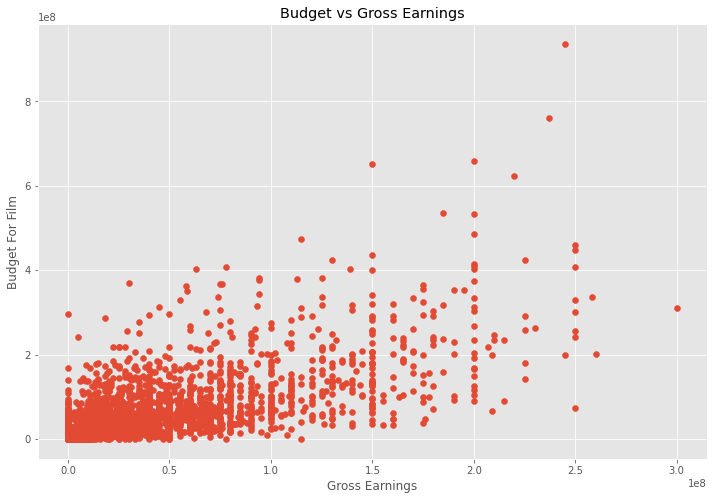

In [107]:
#Scatter plot with budget vs gross

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget For Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

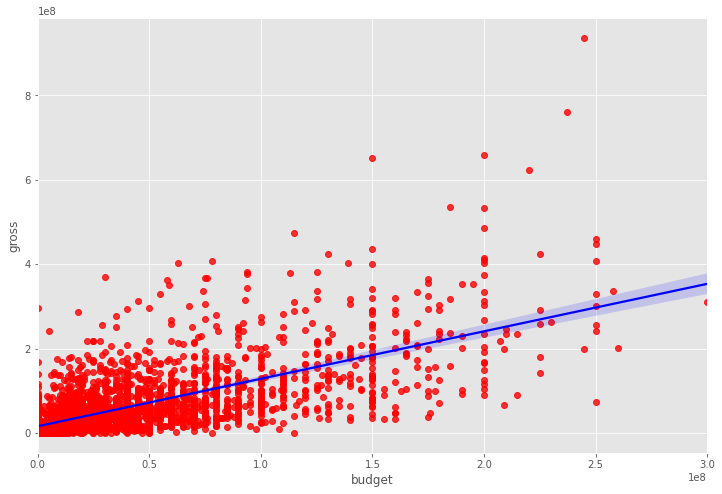

In [108]:
#Plot the budget vs gross using seaborn

sns.regplot(x='budget', y = 'gross', data = df, scatter_kws={'color':"red"}, line_kws= {'color':"blue"})

In [109]:
#Start to look at the correlation 

df.corr(method = 'pearson')

budget     gross   runtime     score      year
budget   1.000000  0.682588  0.309652  0.019061  0.374904
gross    0.682588  1.000000  0.238183  0.171825  0.246975
runtime  0.309652  0.238183  1.000000  0.386864  0.127864
score    0.019061  0.171825  0.386864  1.000000  0.109251
year     0.374904  0.246975  0.127864  0.109251  1.000000

High correlation between and gross

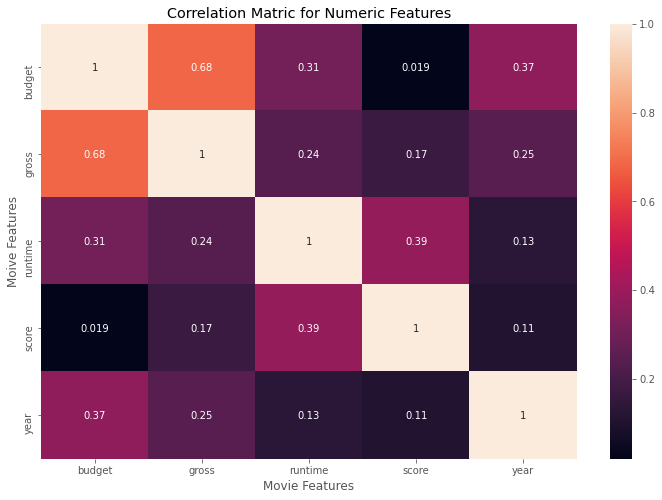

In [110]:
correlation_matrix = df.corr(method='pearson') 

sns.heatmap(correlation_matrix, annot= True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel("Movie Features")

plt.ylabel("Moive Features")

plt.show()

In [111]:
#Look at Company
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] =  df_numerized[col_name].cat.codes
df_numerized

budget  company  country  director  genre      gross  name  rating  \
0       8000000      257       37      1018      1   52287414  2133       6   
1      15000000      668       37      1244      0  179800601  2861       4   
2      18500000      837       37       478      0   85160248   133       6   
3       6000000      668       37       597      4   70136369   827       5   
4       9000000      668       37       449      4   40471663  1777       5   
5       6000000      467       36       895      6  138530565  1750       6   
6       6000000      298       37       256      6    8551228   343       6   
7      10000000      298       37      1141      0    7433663  1464       6   
8      25000000      468       36       547      1   12729917  1314       4   
9       8800000      728        1       940      1  174635000   550       5   
10     16000000      811       36      1074      0    5900000  1058       6   
11     15000000      737       37       245      6   40456565  2422       6   
12     25000000      837       37       577      0   11100000   304       5   
13     15000000      298       37       827      5    8620929  1441       6   
14     17000000      695       37        11      6    6734844    50       6   
15     10000000       55       37       995      4   37499651  2613       4   
16      4700000      197       37      1210      4    8025872  2758       7   
17     25000000      421       37       355      4   38747385  1380       5   
18     25000000      668       37       831      0   79817937  2445       5   
19     35000000      846       37      1269      0   16295774  1107       4   
20            0      257       37       589      0  115103979  2528       4   
21      2700000      631       37       849      0    3500000  2816       5   
22            0      829       37       572      4   40697761  2025       4   
23      6000000      837       37       271      4    8200000  1409       5   
24      2000000      632       37      1136      0   13167232   548       5   
25            0      629       18       516      5    7153487  2623       6   
26      9000000      868       37       985      1   18564613   848       4   
27     25000000      538       37       600      4   39246734  3078       4   
28     25000000      869       37       395      0   49042224   496       6   
29     24500000      869       36      1060      1   17218023  2611       4   
30     15000000      509       37       204      0   42724017  1028       6   
31     13800000      820       37       789      6   52293982  2341       6   
32      1900000      467       37      1203      5    4600000  1879       6   
33      3000000      668       37      1226      9   19472057  1205       6   
34     12000000      200       37      1210      9    4884663  1175       4   
35            0      607       37       947      0   38500726  1919       6   
36      6000000      455       37      1029     13    5844868  2479       6   
37            0      846       37       293      2   47483002   166       0   
38      4000000      499       36        31      3    2826523  2038       6   
39     25000000      668       37       726      1  109713132  2136       4   
40     25000000      807       37       959      1   14302779  2616       4   
41     18000000      829       37       344      4   41382841  1719       5   
42     11000000      654       37        18      4   91258000   230       5   
43      4500000      338       37      1171      9    1261000   894       6   
44      1100000      338       37       575      4    5450815  2883       5   
45      6400000      654       37      1284      4   40084041   998       5   
46            0      800       37       430      6    2015882  1820       4   
47            0      257       37      1260      6    5839031   554       6   
48            0      420       10       517      6    2003822   291       3   
49      6000000      791       37       869      2    58496

In [112]:
df

budget  company  country  director  genre      gross  name  rating  \
0       8000000      257       37      1018      1   52287414  2133       6   
1      15000000      668       37      1244      0  179800601  2861       4   
2      18500000      837       37       478      0   85160248   133       6   
3       6000000      668       37       597      4   70136369   827       5   
4       9000000      668       37       449      4   40471663  1777       5   
5       6000000      467       36       895      6  138530565  1750       6   
6       6000000      298       37       256      6    8551228   343       6   
7      10000000      298       37      1141      0    7433663  1464       6   
8      25000000      468       36       547      1   12729917  1314       4   
9       8800000      728        1       940      1  174635000   550       5   
10     16000000      811       36      1074      0    5900000  1058       6   
11     15000000      737       37       245      6   40456565  2422       6   
12     25000000      837       37       577      0   11100000   304       5   
13     15000000      298       37       827      5    8620929  1441       6   
14     17000000      695       37        11      6    6734844    50       6   
15     10000000       55       37       995      4   37499651  2613       4   
16      4700000      197       37      1210      4    8025872  2758       7   
17     25000000      421       37       355      4   38747385  1380       5   
18     25000000      668       37       831      0   79817937  2445       5   
19     35000000      846       37      1269      0   16295774  1107       4   
20            0      257       37       589      0  115103979  2528       4   
21      2700000      631       37       849      0    3500000  2816       5   
22            0      829       37       572      4   40697761  2025       4   
23      6000000      837       37       271      4    8200000  1409       5   
24      2000000      632       37      1136      0   13167232   548       5   
25            0      629       18       516      5    7153487  2623       6   
26      9000000      868       37       985      1   18564613   848       4   
27     25000000      538       37       600      4   39246734  3078       4   
28     25000000      869       37       395      0   49042224   496       6   
29     24500000      869       36      1060      1   17218023  2611       4   
30     15000000      509       37       204      0   42724017  1028       6   
31     13800000      820       37       789      6   52293982  2341       6   
32      1900000      467       37      1203      5    4600000  1879       6   
33      3000000      668       37      1226      9   19472057  1205       6   
34     12000000      200       37      1210      9    4884663  1175       4   
35            0      607       37       947      0   38500726  1919       6   
36      6000000      455       37      1029     13    5844868  2479       6   
37            0      846       37       293      2   47483002   166       0   
38      4000000      499       36        31      3    2826523  2038       6   
39     25000000      668       37       726      1  109713132  2136       4   
40     25000000      807       37       959      1   14302779  2616       4   
41     18000000      829       37       344      4   41382841  1719       5   
42     11000000      654       37        18      4   91258000   230       5   
43      4500000      338       37      1171      9    1261000   894       6   
44      1100000      338       37       575      4    5450815  2883       5   
45      6400000      654       37      1284      4   40084041   998       5   
46            0      800       37       430      6    2015882  1820       4   
47            0      257       37      1260      6    5839031   554       6   
48            0      420       10       517      6    2003822   291       3   
49      6000000      791       37       869      2    58496

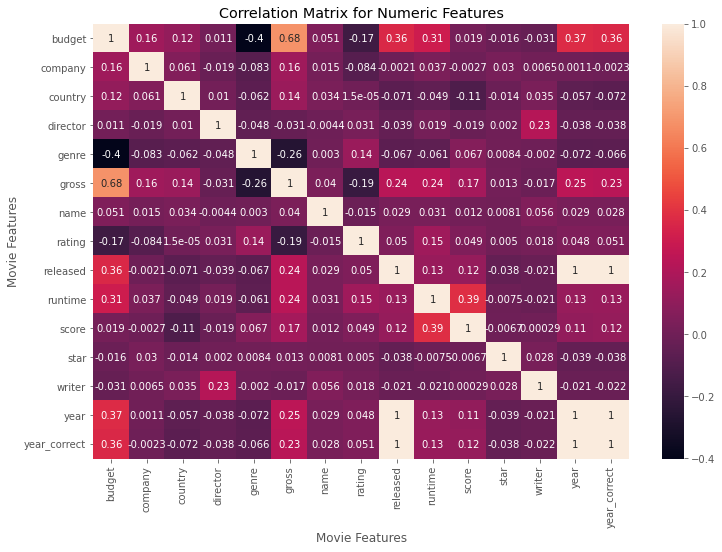

In [113]:
correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [114]:
df_numerized.corr()

budget   company   country  director     genre     gross  \
budget        1.000000  0.157083  0.118863  0.011052 -0.401052  0.682588   
company       0.157083  1.000000  0.061089 -0.018730 -0.083068  0.156013   
country       0.118863  0.061089  1.000000  0.010291 -0.062478  0.138064   
director      0.011052 -0.018730  0.010291  1.000000 -0.048337 -0.031221   
genre        -0.401052 -0.083068 -0.062478 -0.048337  1.000000 -0.263051   
gross         0.682588  0.156013  0.138064 -0.031221 -0.263051  1.000000   
name          0.051049  0.014947  0.034133 -0.004434  0.002989  0.039578   
rating       -0.171070 -0.083646  0.000015  0.030589  0.136055 -0.191666   
released      0.364690 -0.002053 -0.070944 -0.038601 -0.066830  0.237240   
runtime       0.309652  0.037491 -0.049398  0.018846 -0.061327  0.238183   
score         0.019061 -0.002730 -0.113568 -0.018591  0.067234  0.171825   
star         -0.016357  0.030054 -0.014146  0.001973  0.008380  0.013428   
writer       -0.031269  0.006527  0.035367  0.227905 -0.001986 -0.017184   
year          0.374904  0.001121 -0.057044 -0.037946 -0.072299  0.246975   
year_correct  0.361727 -0.002346 -0.072135 -0.038486 -0.065987  0.234971   

                  name    rating  released   runtime     score      star  \
budget        0.051049 -0.171070  0.364690  0.309652  0.019061 -0.016357   
company       0.014947 -0.083646 -0.002053  0.037491 -0.002730  0.030054   
country       0.034133  0.000015 -0.070944 -0.049398 -0.113568 -0.014146   
director     -0.004434  0.030589 -0.038601  0.018846 -0.018591  0.001973   
genre         0.002989  0.136055 -0.066830 -0.061327  0.067234  0.008380   
gross         0.039578 -0.191666  0.237240  0.238183  0.171825  0.013428   
name          1.000000 -0.014934  0.029409  0.031283  0.011649  0.008144   
rating       -0.014934  1.000000  0.049616  0.153396  0.048781  0.004985   
released      0.029409  0.049616  1.000000  0.133181  0.120931 -0.037896   
runtime       0.031283  0.153396  0.133181  1.000000  0.386864 -0.007494   
score         0.011649  0.048781  0.120931  0.386864  1.000000 -0.006750   
star          0.008144  0.004985 -0.037896 -0.007494 -0.006750  1.000000   
writer        0.055729  0.017506 -0.021203 -0.020986  0.000293  0.027501   
year          0.028571  0.048356  0.996873  0.127864  0.109251 -0.039222   
year_correct  0.027662  0.051107  0.999434  0.130664  0.119861 -0.038432   

                writer      year  year_correct  
budget       -0.031269  0.374904      0.361727  
company       0.006527  0.001121     -0.002346  
country       0.035367 -0.057044     -0.072135  
director      0.227905 -0.037946     -0.038486  
genre        -0.001986 -0.072299     -0.065987  
gross        -0.017184  0.246975      0.234971  
name          0.055729  0.028571      0.027662  
rating        0.017506  0.048356      0.051107  
released     -0.021203  0.996873      0.999434  
runtime      -0.020986  0.127864      0.130664  
score         0.000293  0.109251      0.119861  
star          0.027501 -0.039222     -0.038432  
writer        1.000000 -0.021123     -0.021537  
year         -0.021123  1.000000      0.996846  
year_correct -0.021537  0.996846      1.000000

In [115]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

budget        budget          1.000000
              company         0.157083
              country         0.118863
              director        0.011052
              genre          -0.401052
              gross           0.682588
              name            0.051049
              rating         -0.171070
              released        0.364690
              runtime         0.309652
              score           0.019061
              star           -0.016357
              writer         -0.031269
              year            0.374904
              year_correct    0.361727
company       budget          0.157083
              company         1.000000
              country         0.061089
              director       -0.018730
              genre          -0.083068
              gross           0.156013
              name            0.014947
              rating         -0.083646
              released       -0.002053
              runtime         0.037491
              score      

In [116]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.401052
budget        genre          -0.401052
genre         gross          -0.263051
gross         genre          -0.263051
              rating         -0.191666
rating        gross          -0.191666
              budget         -0.171070
budget        rating         -0.171070
country       score          -0.113568
score         country        -0.113568
rating        company        -0.083646
company       rating         -0.083646
genre         company        -0.083068
company       genre          -0.083068
genre         year           -0.072299
year          genre          -0.072299
year_correct  country        -0.072135
country       year_correct   -0.072135
released      country        -0.070944
country       released       -0.070944
genre         released       -0.066830
released      genre          -0.066830
year_correct  genre          -0.065987
genre         year_correct   -0.065987
              country        -0.062478
country       genre      

In [117]:
high_corr = sorted_pairs[(sorted_pairs) > .5]
high_corr

gross         budget          0.682588
budget        gross           0.682588
year_correct  year            0.996846
year          year_correct    0.996846
released      year            0.996873
year          released        0.996873
released      year_correct    0.999434
year_correct  released        0.999434
budget        budget          1.000000
rating        rating          1.000000
writer        writer          1.000000
star          star            1.000000
score         score           1.000000
runtime       runtime         1.000000
released      released        1.000000
name          name            1.000000
gross         gross           1.000000
genre         genre           1.000000
director      director        1.000000
country       country         1.000000
company       company         1.000000
year          year            1.000000
year_correct  year_correct    1.000000
dtype: float64

The companies budget for the movie has the highest correlation with higher gross. However, the company has no correlation with the gross.